In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IA.utils import mapping, parameter_range
from scipy import stats
import math
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn import metrics

In [81]:
df = pd.read_csv("analysis/not_uploaded/IA/FIVEK/.scratch.ckpts.IA.pexels.scores-one.change_regress.epoch-17.pth.txt")
df["editor"] = df["img"].apply(lambda row: Path(row).parts[-2][-1])
df["editor"] = df["editor"].apply(lambda row: ["a", "b", "c", "d", "e"].index(row))
df["img"] = df["img"].apply(lambda row: Path(row).stem)
df = df.set_index(["img", "editor"])
df = df.sort_index()
df = df.drop_duplicates()
df = df.reset_index()
df

,img,editor,score,styles_contrast_strength,styles_brightness_strength,styles_saturation_strength,styles_shadows_strength,styles_highlights_strength,styles_exposure_strength,styles_vibrance_strength,...,technical_motion_blur_strength,technical_pixelate_strength,technical_gaussian_noise_strength,technical_impulse_noise_strength,composition_rotate_strength,composition_hcrop_strength,composition_vcrop_strength,composition_leftcornerscrop_strength,composition_rightcornerscrop_strength,composition_ratio_strength
0,a0001-jmac_DSC1459,0,0.667480,0.122498,0.217529,0.090027,0.204590,0.189575,0.109558,0.154907,...,0.138672,0.324463,0.152954,0.148193,-0.047180,-0.140747,0.138672,0.103271,0.175659,0.313477
1,a0001-jmac_DSC1459,1,0.387207,-0.183594,0.540039,-0.184204,0.375488,0.381348,0.230225,0.109680,...,0.335205,0.414062,0.261475,0.281006,-0.011032,-0.069214,-0.040039,-0.060822,-0.024902,0.317627
2,a0001-jmac_DSC1459,2,0.618652,-0.131714,0.369629,-0.123596,0.109131,0.417725,-0.072998,0.134888,...,0.241699,0.356689,0.171509,0.179077,0.084229,-0.107910,-0.268555,-0.289551,-0.214233,0.390381
3,a0001-jmac_DSC1459,3,0.608398,0.051636,0.415527,-0.174194,0.313477,0.374268,0.214355,0.082336,...,0.175781,0.327393,0.152710,0.163940,0.006409,-0.073608,0.031433,0.002239,0.061523,0.220093
4,a0001-jmac_DSC1459,4,0.609375,0.089111,0.340820,-0.083740,0.242798,0.400391,0.202515,0.104858,...,0.169556,0.349854,0.148438,0.164673,-0.036957,-0.084106,0.163696,0.130615,0.194946,0.305908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24665,a5000-kme_0204,0,0.870605,0.249878,-0.097290,0.355957,0.368896,0.031021,0.018906,0.159424,...,-0.223389,0.043488,-0.017212,-0.084167,-0.024017,-0.005531,0.399170,0.354004,0.420654,0.235352
24666,a5000-kme_0204,1,0.694336,0.462891,-0.192139,0.162354,0.414795,-0.020950,-0.076294,0.136475,...,-0.201294,0.132446,0.038177,-0.053070,-0.065613,-0.037750,0.910156,0.873535,0.941406,0.064819
24667,a5000-kme_0204,2,0.776367,0.306641,-0.106873,0.239380,0.313232,0.079224,0.012108,0.130493,...,-0.111755,0.105225,0.084473,0.014214,-0.046173,0.040833,0.424072,0.394287,0.420410,0.065796
24668,a5000-kme_0204,3,0.762695,0.348145,-0.154785,0.224609,0.181274,0.028397,-0.056274,0.142700,...,-0.132812,0.193604,0.053864,-0.020508,-0.059265,0.025299,0.435059,0.390625,0.450439,0.086121


In [82]:
imgs_counted = df.groupby(by=["img"]).count()
missing_imgs = imgs_counted[imgs_counted["editor"] != 5].reset_index()
missing_imgs

,img,editor,score,styles_contrast_strength,styles_brightness_strength,styles_saturation_strength,styles_shadows_strength,styles_highlights_strength,styles_exposure_strength,styles_vibrance_strength,...,technical_motion_blur_strength,technical_pixelate_strength,technical_gaussian_noise_strength,technical_impulse_noise_strength,composition_rotate_strength,composition_hcrop_strength,composition_vcrop_strength,composition_leftcornerscrop_strength,composition_rightcornerscrop_strength,composition_ratio_strength
0,a0059-JI2E5556,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,a0060-jmac_DSC3171,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,a0061-jn_20080802_0003,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,a0134-LS051025_day_2_LL003,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,a0135-IMG_2595,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,a2605-kme_368,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
126,a2606-_MG_1165,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
127,a2715-WP_CRW_0685,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
128,a4291-20090417_at_18h46m58__MG_2026,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [83]:
df = df[~df["img"].isin(missing_imgs["img"])]
df

,img,editor,score,styles_contrast_strength,styles_brightness_strength,styles_saturation_strength,styles_shadows_strength,styles_highlights_strength,styles_exposure_strength,styles_vibrance_strength,...,technical_motion_blur_strength,technical_pixelate_strength,technical_gaussian_noise_strength,technical_impulse_noise_strength,composition_rotate_strength,composition_hcrop_strength,composition_vcrop_strength,composition_leftcornerscrop_strength,composition_rightcornerscrop_strength,composition_ratio_strength
0,a0001-jmac_DSC1459,0,0.667480,0.122498,0.217529,0.090027,0.204590,0.189575,0.109558,0.154907,...,0.138672,0.324463,0.152954,0.148193,-0.047180,-0.140747,0.138672,0.103271,0.175659,0.313477
1,a0001-jmac_DSC1459,1,0.387207,-0.183594,0.540039,-0.184204,0.375488,0.381348,0.230225,0.109680,...,0.335205,0.414062,0.261475,0.281006,-0.011032,-0.069214,-0.040039,-0.060822,-0.024902,0.317627
2,a0001-jmac_DSC1459,2,0.618652,-0.131714,0.369629,-0.123596,0.109131,0.417725,-0.072998,0.134888,...,0.241699,0.356689,0.171509,0.179077,0.084229,-0.107910,-0.268555,-0.289551,-0.214233,0.390381
3,a0001-jmac_DSC1459,3,0.608398,0.051636,0.415527,-0.174194,0.313477,0.374268,0.214355,0.082336,...,0.175781,0.327393,0.152710,0.163940,0.006409,-0.073608,0.031433,0.002239,0.061523,0.220093
4,a0001-jmac_DSC1459,4,0.609375,0.089111,0.340820,-0.083740,0.242798,0.400391,0.202515,0.104858,...,0.169556,0.349854,0.148438,0.164673,-0.036957,-0.084106,0.163696,0.130615,0.194946,0.305908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24665,a5000-kme_0204,0,0.870605,0.249878,-0.097290,0.355957,0.368896,0.031021,0.018906,0.159424,...,-0.223389,0.043488,-0.017212,-0.084167,-0.024017,-0.005531,0.399170,0.354004,0.420654,0.235352
24666,a5000-kme_0204,1,0.694336,0.462891,-0.192139,0.162354,0.414795,-0.020950,-0.076294,0.136475,...,-0.201294,0.132446,0.038177,-0.053070,-0.065613,-0.037750,0.910156,0.873535,0.941406,0.064819
24667,a5000-kme_0204,2,0.776367,0.306641,-0.106873,0.239380,0.313232,0.079224,0.012108,0.130493,...,-0.111755,0.105225,0.084473,0.014214,-0.046173,0.040833,0.424072,0.394287,0.420410,0.065796
24668,a5000-kme_0204,3,0.762695,0.348145,-0.154785,0.224609,0.181274,0.028397,-0.056274,0.142700,...,-0.132812,0.193604,0.053864,-0.020508,-0.059265,0.025299,0.435059,0.390625,0.450439,0.086121


In [84]:
df.columns

Index(['img', 'editor', 'score', 'styles_contrast_strength',
       'styles_brightness_strength', 'styles_saturation_strength',
       'styles_shadows_strength', 'styles_highlights_strength',
       'styles_exposure_strength', 'styles_vibrance_strength',
       'styles_temperature_strength', 'styles_tint_strength',
       'technical_jpeg_compression_strength',
       'technical_defocus_blur_strength', 'technical_motion_blur_strength',
       'technical_pixelate_strength', 'technical_gaussian_noise_strength',
       'technical_impulse_noise_strength', 'composition_rotate_strength',
       'composition_hcrop_strength', 'composition_vcrop_strength',
       'composition_leftcornerscrop_strength',
       'composition_rightcornerscrop_strength', 'composition_ratio_strength'],
      dtype='object')

In [85]:
split = (len(df) // 5)*0.8
features = [c for c in df.columns if c not in ["index", "img", "editor"]]
train = df[df.index <= split].reset_index()[features + ["editor"]]
test = df[df.index > split].reset_index()[features + ["editor"]]

In [91]:
reg = OneVsRestClassifier(svm.SVC()).fit(train[features], train["editor"])
reg.score(train[features], train["editor"])

0.6881868131868132

In [92]:
reg.score(test[features], test["editor"])

0.21649233763074677

In [95]:
res = reg.predict(test[features])

In [100]:
from sklearn.decomposition import PCA

In [102]:
pca = PCA(n_components=2).fit(train[features], train["editor"])

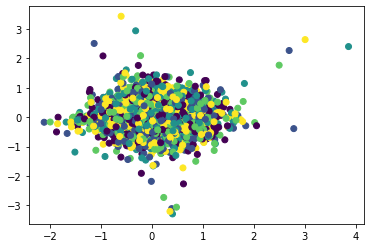

In [105]:
plt.scatter(pca.transform(train[features])[:, 0], pca.transform(train[features])[:, 1], c=train["editor"])

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
neigh = KNeighborsClassifier().fit(train[features], train["editor"])
neigh.score(train[features], train["editor"])

0.2826923076923077

In [109]:
neigh.score(test[features], test["editor"])

0.20705424470931647